In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [78]:
df = pd.read_csv('dataset 3.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df['school'].unique()
df['sex'].unique()
df['address'].unique()
df['famsize'].unique()
df['Pstatus'].unique()
df['Mjob'].unique()
df['Fjob'].unique()
df['reason'].unique()
df['guardian'].unique()
df['schoolsup'].unique()
df['famsup'].unique()
df['paid'].unique()
df['activities'].unique()
df['nursery'].unique()
df['higher'].unique()
df['internet'].unique()
df['romantic'].unique()


array(['no', 'yes'], dtype=object)

In [ ]:
df['school']=df['school'].replace({'GP':1, 'MS':2})
df['sex']=df['sex'].replace({'F':1, 'M':2})
df['address']=df['address'].replace({'U':1, 'R':2})
df['famsize']=df['famsize'].replace({'LE3':1, 'GT3':2})
df['Pstatus']=df['Pstatus'].replace({'T':1, 'A':2})
df['Mjob']=df['Mjob'].replace({'teacher':1, 'health':2, 'services':3, 'at_home':4, 'other':5})
df['Fjob']=df['Fjob'].replace({'teacher':1, 'health':2, 'services':3, 'at_home':4, 'other':5})
df['reason']=df['reason'].replace({'home':1, 'reputation':2, 'course':3, 'other':4})
df['guardian']=df['guardian'].replace({'mother':1, 'father':2, 'other':3})
df['schoolsup']=df['schoolsup'].replace({'yes':1, 'no': 2})
df['famsup']=df['famsup'].replace({'yes':1, 'no': 2})
df['paid']=df['paid'].replace({'yes':1, 'no': 2})
df['activities']=df['activities'].replace({'yes':1, 'no': 2})
df['nursery']=df['nursery'].replace({'yes':1, 'no': 2})
df['higher']=df['higher'].replace({'yes':1, 'no': 2})
df['internet']=df['internet'].replace({'yes':1, 'no': 2})
df['romantic']=df['romantic'].replace({'yes':1, 'no': 2})


<Axes: >

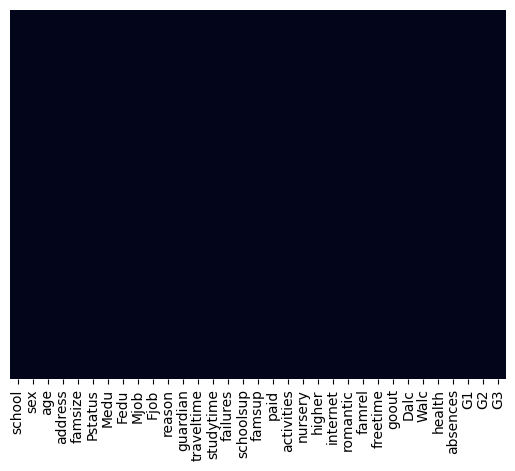

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
X = df.drop(columns='school')
X

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,18,1,2,2,4,4,4,1,3,...,4,3,4,1,1,3,6,5,6,6
1,1,17,1,2,1,1,1,4,5,3,...,5,3,3,1,1,3,4,5,5,6
2,1,15,1,1,1,1,1,4,5,4,...,4,3,2,2,3,3,10,7,8,10
3,1,15,1,2,1,4,2,2,3,1,...,3,2,2,1,1,5,2,15,14,15
4,1,16,1,2,1,3,3,5,5,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,20,1,1,2,2,2,3,3,3,...,5,5,4,4,5,4,11,9,9,9
391,2,17,1,1,1,3,1,3,3,3,...,2,4,5,3,4,2,3,14,16,16
392,2,21,2,2,1,1,1,5,5,3,...,5,5,3,3,3,3,3,10,8,7
393,2,18,2,1,1,3,2,3,5,3,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,2,2,4,4,4,1,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,2,1,1,1,4,5,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,1,1,1,1,4,5,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,2,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,2,1,3,3,5,5,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
y = df['school']
y

,school
0,1
1,1
2,1
3,1
4,1
...,...
390,2
391,2
392,2
393,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
X_train

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
44,1,16,1,1,1,2,2,5,4,3,...,4,3,3,2,2,5,14,10,10,9
143,1,16,1,1,1,1,1,4,4,3,...,3,4,4,3,3,1,2,14,14,13
53,1,15,1,2,1,4,4,3,3,3,...,3,3,4,2,3,5,0,8,10,11
102,2,15,1,2,1,4,4,3,5,3,...,5,3,3,1,1,5,4,10,13,14
388,1,18,1,1,1,3,1,1,3,3,...,4,3,4,1,1,1,0,7,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,18,1,2,1,2,3,4,3,3,...,5,2,3,1,2,4,0,11,10,10
48,2,15,1,2,1,4,2,1,5,1,...,4,3,3,2,2,5,2,15,15,14
260,1,18,1,2,1,4,3,3,5,1,...,3,1,2,1,3,2,21,17,18,18
312,2,19,1,2,1,1,2,5,3,3,...,4,5,2,2,2,4,3,13,11,11


In [ ]:
X_test

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
297,1,18,1,1,1,4,3,5,5,1,...,4,4,5,1,2,2,10,10,8,8
293,1,17,2,1,1,3,1,3,5,2,...,3,1,2,1,1,3,6,18,18,18
166,2,16,1,2,1,2,2,5,5,3,...,4,3,5,2,4,4,4,10,10,10
51,1,15,1,1,1,4,2,2,5,4,...,4,3,3,1,1,5,2,11,13,13
199,1,16,1,1,1,4,4,1,1,2,...,4,5,2,1,2,3,0,9,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,2,2,1,1,1,4,5,1,...,3,1,2,1,1,1,2,7,10,10
29,2,16,1,2,1,4,4,1,1,1,...,4,4,5,5,5,5,16,10,12,11
57,2,15,1,2,1,4,4,1,2,2,...,3,2,2,1,1,5,4,14,15,15
180,2,16,1,2,1,4,3,1,5,1,...,3,4,3,2,3,3,10,9,8,8


In [ ]:
y_train

,school
44,1
143,1
53,1
102,1
388,2
...,...
368,2
48,1
260,1
312,1


In [ ]:
y_test

,school
297,1
293,1
166,1
51,1
199,1
...,...
95,1
29,1
57,1
180,1


In [ ]:
from sklearn.svm import SVC
model = SVC(C=7,kernel='poly')
model.fit(X_train,y_train)

SVC(C=7, kernel='poly')

In [ ]:
model.score(X_train,y_train)

0.9492753623188406

In [ ]:
model.score(X_test,y_test)

0.8907563025210085

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

pred = model.predict(X_test)
matrix = classification_report(y_test, pred)
print(matrix)

              precision    recall  f1-score   support

           1       0.89      0.99      0.94       103
           2       0.80      0.25      0.38        16

    accuracy                           0.89       119
   macro avg       0.85      0.62      0.66       119
weighted avg       0.88      0.89      0.86       119



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(33.22222222222222, 0.5, 'Actual value')

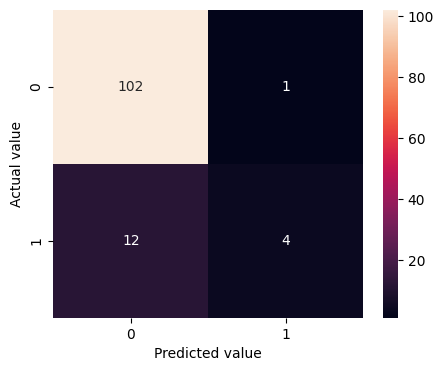

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.ylabel('Actual value')